In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',', index_col='id')
df

,log.Te,log.light
id,,
1,4.37,5.23
2,4.56,5.74
3,4.26,4.93
4,4.56,5.74
5,4.30,5.19
6,4.46,5.46
7,3.84,4.65
8,4.57,5.27
9,4.26,5.57


In [3]:
X = df['log.Te'].values
Y = df['log.light'].values

In [4]:
XY = np.c_[X, Y]
print(XY[:10])

[[4.37 5.23]
 [4.56 5.74]
 [4.26 4.93]
 [4.56 5.74]
 [4.3  5.19]
 [4.46 5.46]
 [3.84 4.65]
 [4.57 5.27]
 [4.26 5.57]
 [4.37 5.12]]


In [5]:
# qf = af.averaging_function("WM", rhofunc=func.Power(1.1, 0.01), alpha=0.86)
qf = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=0.89)
amf = af.averaging_function("AM")

In [6]:
K, c = pca.find_rob_center(XY, qf)
print(K, c)

1 [4.39608644 4.9625607 ]


In [7]:
Z = XY - c
U = (Z * Z).sum(axis=1)
U.sort()

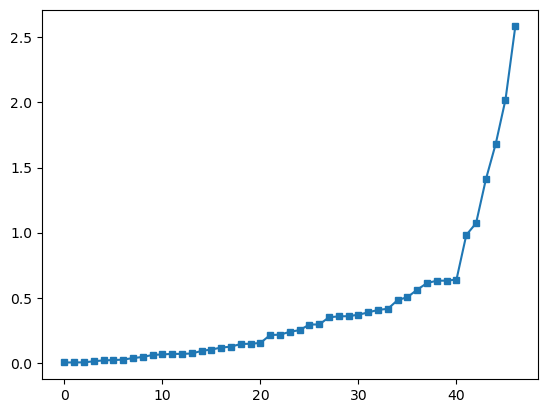

In [8]:
plt.plot(U, marker='s', markersize=4)
plt.show()

In [9]:
N = len(XY)
(N - 5) / N

0.8936170212765957

In [10]:
XY2 = XY - c
S = XY2.T @ XY2
X2 = XY2[:,0]
Y2 = XY2[:,1]
print(S)

[[ 4.23891109 -1.80855103]
 [-1.80855103 15.12646077]]


In [11]:
a0, _, _ = pca.find_pc(XY2)
print(a0)

[-0.15968917  0.98716735]


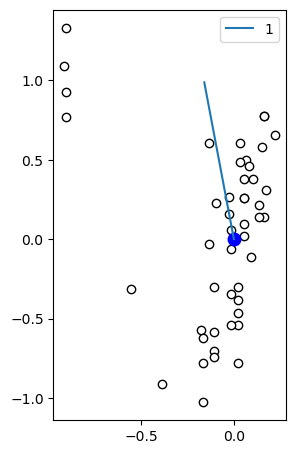

In [12]:
aa = 16/9
plt.figure(figsize=(3,3*aa))
plt.scatter(XY2[:,0], XY2[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([0, a0[0]], [0, a0[1]], label='1')
plt.legend()
plt.show()

(47,)
* 0.03758150800338372 2.0532239625382687 [0.82389015 0.0352846 ]
* 0.01867292833765211 11.590486538643624 [0.42903369 0.90328849]
* 0.015508759820379444 12.322438074968176 [0.26952079 0.96299457]


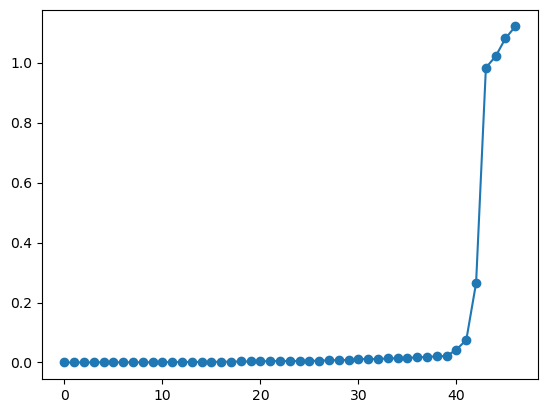

[0.11976116 0.99280273]


In [13]:
a1, L1, Z1 = pca.find_rob_pc(XY2, qf, verbose=1)
plt.plot(sorted(Z1), marker='o')
plt.show()
print(a1)

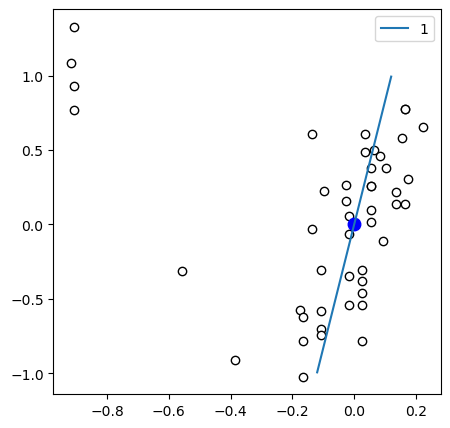

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(X2, Y2, c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-a1[0], 0, a1[0]], [-a1[1], 0, a1[1]], label='1')
plt.legend()
plt.show()